In [19]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Leo file y lo guardo en un DF inicial
df_properatti = pd.read_csv('properatti.csv')
df_properatti.shape

(121220, 26)

In [3]:
df_properatti.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [6]:
df_properatti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 26 columns):
Unnamed: 0                    25792 non-null int64
operation                     25792 non-null object
property_type                 25792 non-null object
place_name                    25784 non-null object
place_with_parent_names       25792 non-null object
country_name                  25792 non-null object
state_name                    25792 non-null object
geonames_id                   21463 non-null float64
lat-lon                       21471 non-null object
lat                           21471 non-null float64
lon                           21471 non-null float64
price                         20162 non-null float64
currency                      20161 non-null object
price_aprox_local_currency    20162 non-null float64
price_aprox_usd               20162 non-null float64
surface_total_in_m2           17774 non-null float64
surface_covered_in_m2         22004 non-null float64


In [27]:
df_properatti['place_with_parent_names'].nunique()

1164

In [6]:
df_properatti['property_type'].unique()

array(['PH', 'apartment', 'house', 'store'], dtype=object)

In [13]:
df_properatti['place_name'].unique()

array(['Mataderos', 'La Plata', 'Liniers', 'Centro', 'Gualeguaychú',
       'Munro', 'Belgrano', 'Rosario', 'Córdoba', 'San Miguel',
       'Martínez', 'Palermo Soho', 'Bella Vista', 'Barrio El Golf',
       'Tigre', 'Palermo', 'Villa Giardino', 'General Rodríguez', 'Pilar',
       'Castelar', 'Barrio San Gabriel', 'Estancias del Pilar', 'Flores',
       'Boedo', 'Malagueño', 'Las Cañitas', 'Del Viso',
       'Villa Carlos Paz', 'Puerto Madero', 'Balvanera', 'Escobar',
       'San Isidro', 'Caballito', 'Acassuso', 'Nuñez', 'Fincas de Iraola',
       'Berazategui', 'San Martín', 'Ituzaingó', 'Mar del Plata',
       'Posadas', 'Caseros', 'San Bernardo', 'San Telmo', 'Almagro',
       'Nordelta', 'Capital Federal', 'Boulogne Sur Mer', 'Victoria',
       'Pinamar', 'Benavidez', 'Beccar', 'Colón', 'Luján', 'San Lorenzo',
       'Bs.As. G.B.A. Zona Sur', 'Lomas del Mirador', 'Lanús Este',
       'Punilla', 'Villa Gesell', 'Banfield', 'Jose Leon Suarez', 'Salta',
       'Olivos', 'Santa Fe', 

In [14]:
df_properatti['country_name'].unique()

array(['Argentina'], dtype=object)

In [9]:
df_properatti[df_properatti['description'].isnull()==True]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
10664,10664,sell,apartment,Villa Carlos Paz,|Argentina|Córdoba|Villa Carlos Paz|,Argentina,Córdoba,3832791.0,"-31.4207828,-64.4992141",-31.420783,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/168nc_venta_depart...,NaN,HERMOSO DEPARTAMENTO CON PISCINA Y COCHERA,https://thumbs4.properati.com/6/JiAoy6zsKPeBob...
96691,96691,sell,apartment,San Fernando,|Argentina|Bs.As. G.B.A. Zona Norte|San Fernando|,Argentina,Bs.As. G.B.A. Zona Norte,3429088.0,NaN,NaN,...,55.0,NaN,1781.818182,NaN,NaN,NaN,http://www.properati.com.ar/1bj1r_venta_depart...,NaN,Departamento - San Fernando,https://thumbs4.properati.com/1/FZZcNCsb4-ucU2...


In [10]:
df_properatti.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

In [76]:
df_properatti[['price_aprox_usd']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 1 columns):
price_aprox_usd    20162 non-null float64
dtypes: float64(1)
memory usage: 201.6 KB


In [40]:
df_properatti[['price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 1 columns):
price    20162 non-null float64
dtypes: float64(1)
memory usage: 201.6 KB


([array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 array([ 25798.49 ,  42718.641,  59638.792,  76558.943,  93479.094,
        110399.245, 127319.396, 144239.547, 161159.698, 178079.849,
        195000.   ]),
 <a list of 10 Lists of Patches objects>)

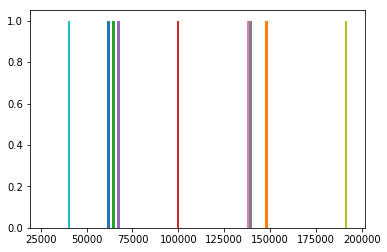

In [81]:
#Tomo un variable numerica y me creo un df para poder eliminar los vacios y ver que distribucion tiene por barrio
df_price = df_properatti[['price_aprox_usd']]
plt.hist(df_price.head(10))

In [16]:
df_Localidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164 entries, 0 to 1163
Data columns (total 7 columns):
(place_with_parent_names, )           1164 non-null object
(price, min)                          1063 non-null float64
(price, max)                          1063 non-null float64
(price, mean)                         1063 non-null float64
(price_aprox_local_currency, min)     1063 non-null float64
(price_aprox_local_currency, max)     1063 non-null float64
(price_aprox_local_currency, mean)    1063 non-null float64
dtypes: float64(6), object(1)
memory usage: 72.8+ KB


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


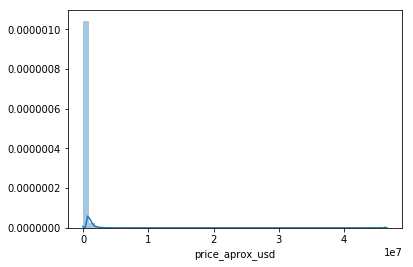

In [11]:
#Creo un grafico con todos los reg distinos a null para la columna "price_aprox_usd"
sns.distplot(df_properatti[df_properatti['price_aprox_usd'].isnull()==False]['price_aprox_usd'])

In [12]:
df_properatti['price_aprox_usd'].isnull()['place_name']=='Mataderos'

KeyError: 'place_name'

In [14]:
df_properatti[df_properatti['price_aprox_usd'].isnull()==False].head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [59]:
#Creo un df donde no hay vacios en una columna numerica que quiero analizar
df_price = df_properatti[df_properatti['price'].isnull()==False]

In [16]:
#Verifico que no haya nulos en la columna que quiero analizar
df_price_usd_per_m2[['price_usd_per_m2']].isnull().sum()

price_usd_per_m2    0
dtype: int64

In [23]:
#Creo un nuevo df para un solo barrio
df_price_usd_per_m2[df_price_usd_per_m2['place_name'] == 'Mataderos']

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
16,16,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6523561177,-58.5016239381",-34.652356,...,98.0,1707.142857,2438.775510,NaN,4.0,NaN,http://www.properati.com.ar/15bpj_venta_ph_mat...,Ventas Mataderos al frente Duplex 4 amb.- Plan...,VENTA-MATADEROS-DUPLEX 4 AMB.,https://thumbs4.properati.com/7/XSdJtiE8ZkWgon...
254,254,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6572422,-58.5029706",-34.657242,...,28.0,1892.857143,1892.857143,NaN,1.0,NaN,http://www.properati.com.ar/15doz_venta_ph_mat...,PH un ambiente a pasitos de J.B.Alberdi. Muy l...,PH GUARDIA NACIONAL 1052. MONOAMBIENTE A REFAC...,https://thumbs4.properati.com/5/MbvlU4h76RWDhr...
557,557,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6506036,-58.4961457",-34.650604,...,160.0,751.533742,1531.250000,NaN,4.0,NaN,http://www.properati.com.ar/15f8t_venta_ph_mat...,"ESPECTACULAR PH AL FRENTE EN PLANTA BAJA, UBIC...",Hermosa casa en venta en Mataderos,https://thumbs4.properati.com/6/FQtu6UaRg1EqXy...
559,559,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6569204,-58.4897843",-34.656920,...,150.0,1100.000000,1100.000000,NaN,3.0,NaN,http://www.properati.com.ar/15f90_venta_ph_mat...,"PH en planta baja con: 150m2 de superficie, 2 ...",PH en Mataderos con dos locales,https://thumbs4.properati.com/0/YAaDojlC3ailUt...
1091,1091,sell,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6523981,-58.493856",-34.652398,...,69.0,743.243243,2391.304348,NaN,NaN,NaN,http://www.properati.com.ar/15h9n_venta_casa_m...,Casa totalmente a refaccionar (sobre lote de 8...,Casa Valor Lote,https://thumbs4.properati.com/9/o92Tl-d-OVq3Lc...
5178,5178,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6494154483,-58.5082290736",-34.649415,...,70.0,1755.555556,2257.142857,NaN,3.0,NaN,http://www.properati.com.ar/15pcg_venta_ph_mat...,Ph 3 Amb en Mataderos!!! PROPIEDAD APTO CRÉDIT...,PH EN VENTA,https://thumbs4.properati.com/9/6uqU0hIl5KnyuL...
5189,5189,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6632395,-58.5056703",-34.663240,...,28.0,1675.000000,2392.857143,NaN,NaN,NaN,http://www.properati.com.ar/15pf1_venta_depart...,"EDIFICIO YA TERMINADO, DE 3 PISOS CON ASCENSOR...","ULTIMOS DISPONIBLES, DEPARTAMENTO 1 AMBIENTE C...",https://thumbs4.properati.com/4/BD_FH1dYjKH8qC...
5368,5368,sell,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.652252,-58.5117942",-34.652252,...,238.0,900.000000,1134.453782,NaN,4.0,NaN,http://www.properati.com.ar/15pzu_venta_casa_m...,Venta de Casa 4 AMBIENTES en Mataderos!!! EXC...,CASA EN VENTA,https://thumbs4.properati.com/2/9ZYGRKd6i16lKd...


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


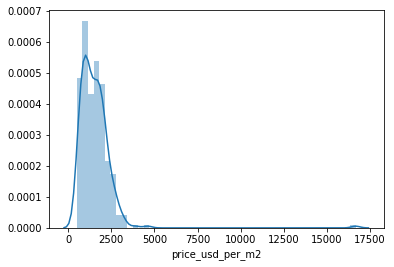

In [24]:
#Este grafico muestra la distribucion de los m2 de las propiedades de Mataderos
sns.distplot(df_price_usd_per_m2[df_price_usd_per_m2['place_name'] == 'Mataderos']['price_usd_per_m2'])

In [89]:
cond_mschw = df_price['place_with_parent_names'] == '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Cerrado Fincas de Maschwitz|'
cond_prec = df_price['price'] < 600000

In [86]:
df_price.loc[cond_mschw & cond_prec,['price']].plot.hist(bins=100)

286      650000.0
35112    230000.0
56624    210000.0
Name: price, dtype: float64

In [50]:
#Creo un nuevo DF por localidad con datos estadisticos de las variables numericas
df_properatti.groupby('place_with_parent_names',as_index=False).agg({'price':['min', 'max','mean', shapiro],
                                                                     'price_aprox_local_currency': ['min', 'max','mean'],
                                                                     'price_aprox_usd'           :['min', 'max','mean'],
                                                                     'price_usd_per_m2'          :['min', 'max','mean'],
                                                                     'price_per_m2'              :['min', 'max','mean'],
                                                                     'floor'                     :['min', 'max','mean'],
                                                                     'expenses'                  :['min', 'max','mean'],
                                                                     'surface_total_in_m2'       :['min', 'max','mean'],
                                                                     'surface_covered_in_m2'     :['min', 'max','mean']})

/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


place_with_parent_names      price  \
                                                               min   
0                  |Argentina|Bs.As. G.B.A. Zona Norte|    35000.0   
1          |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|    25000.0   
2     |Argentina|Bs.As. G.B.A. Zona Norte|Escobar| C...   195000.0   
3     |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ac...   120000.0   
4     |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Al...   135000.0   
5     |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   350000.0   
6     |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   248000.0   
7     |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   450000.0   
8     |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   239000.0   
9     |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   278000.0   
10    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   215000.0   
11    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   210000.0   
12    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   268000.0   
13    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   135000.0   
14    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   210000.0   
15    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   385000.0   
16    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   310000.0   
17    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   330000.0   
18    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   205000.0   
19    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   340000.0   
20    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Be...    17000.0   
21    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ca...   138000.0   
22    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Cl...   158000.0   
23    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Co...   150000.0   
24    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Co...   189000.0   
25    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|El...   290000.0   
26    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|El...   400000.0   
27    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|El...   210000.0   
28    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|El...    92000.0   
29    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Fi...   235000.0   
...                                                 ...        ...   
1134                     |Argentina|Santa Fe|San Justo|   750000.0   
1135                   |Argentina|Santa Fe|San Lorenzo|    55000.0   
1136                      |Argentina|Santa Fe|Santa Fe|    50000.0   
1137       |Argentina|Santa Fe|Santa Rosa de Calchines|        NaN   
1138                  |Argentina|Santa Fe|Santa Teresa|        NaN   
1139                    |Argentina|Santa Fe|Santo Tomé|    73000.0   
1140                     |Argentina|Santa Fe|Sarmiento|        NaN   
1141                   |Argentina|Santa Fe|Sauce Viejo|        NaN   
1142                      |Argentina|Santa Fe|Serodino|   100000.0   
1143                     |Argentina|Santa Fe|Sunchales|        NaN   
1144                        |Argentina|Santa Fe|Susana|        NaN   
1145                       |Argentina|Santa Fe|Timbúes|  1200000.0   
1146                 |Argentina|Santa Fe|Venado Tuerto|   320000.0   
1147            |Argentina|Santa Fe|Villa Constitución|  1350000.0   
1148                       |Argentina|Santa Fe|Álvarez|        NaN   
1149                    |Argentina|Santiago Del Estero|   280000.0   
1150              |Argentina|Santiago Del Estero|Pinto|   180000.0   
1151                       |Argentina|Tierra Del Fuego|  1200000.0   
1152            |Argentina|Tierra Del Fuego|Río Grande|   249500.0   
1153               |Argentina|Tierra Del Fuego|Ushuaia|   118000.0   
1154                                |Argentina|Tucumán|   110000.0   
1155             |Argentina|Tucumán|Banda del Río Salí|        NaN   
1156                     |Argentina|Tucumán|Concepción|        NaN   
1157                    |Argentina|Tucumán|Las Talitas|        NaN   
1158                          |Argentina|T

In [95]:
lista_cols = ['price', 'price_aprox_local_currency']
funciones_agregacion = ['min', 'max',np.mean, shapiro]
condiciones_agregacion = {col: funciones_agregacion for col in lista_cols}


{'price': ['min',
  'max',
  <function numpy.core.fromnumeric.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>)>,
  <function __main__.shapiro(x)>],
 'price_aprox_local_currency': ['min',
  'max',
  <function numpy.core.fromnumeric.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>)>,
  <function __main__.shapiro(x)>]}

In [96]:
df_properatti.groupby('place_with_parent_names',as_index=False).agg(condiciones_agregacion)

/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


place_with_parent_names      price  \
                                                               min   
0                  |Argentina|Bs.As. G.B.A. Zona Norte|    35000.0   
1          |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|    25000.0   
2     |Argentina|Bs.As. G.B.A. Zona Norte|Escobar| C...   195000.0   
3     |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ac...   120000.0   
4     |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Al...   135000.0   
5     |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   350000.0   
6     |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   248000.0   
7     |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   450000.0   
8     |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   239000.0   
9     |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   278000.0   
10    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   215000.0   
11    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   210000.0   
12    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   268000.0   
13    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   135000.0   
14    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   210000.0   
15    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   385000.0   
16    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   310000.0   
17    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   330000.0   
18    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   205000.0   
19    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   340000.0   
20    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Be...    17000.0   
21    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ca...   138000.0   
22    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Cl...   158000.0   
23    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Co...   150000.0   
24    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Co...   189000.0   
25    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|El...   290000.0   
26    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|El...   400000.0   
27    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|El...   210000.0   
28    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|El...    92000.0   
29    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Fi...   235000.0   
...                                                 ...        ...   
1134                     |Argentina|Santa Fe|San Justo|   750000.0   
1135                   |Argentina|Santa Fe|San Lorenzo|    55000.0   
1136                      |Argentina|Santa Fe|Santa Fe|    50000.0   
1137       |Argentina|Santa Fe|Santa Rosa de Calchines|        NaN   
1138                  |Argentina|Santa Fe|Santa Teresa|        NaN   
1139                    |Argentina|Santa Fe|Santo Tomé|    73000.0   
1140                     |Argentina|Santa Fe|Sarmiento|        NaN   
1141                   |Argentina|Santa Fe|Sauce Viejo|        NaN   
1142                      |Argentina|Santa Fe|Serodino|   100000.0   
1143                     |Argentina|Santa Fe|Sunchales|        NaN   
1144                        |Argentina|Santa Fe|Susana|        NaN   
1145                       |Argentina|Santa Fe|Timbúes|  1200000.0   
1146                 |Argentina|Santa Fe|Venado Tuerto|   320000.0   
1147            |Argentina|Santa Fe|Villa Constitución|  1350000.0   
1148                       |Argentina|Santa Fe|Álvarez|        NaN   
1149                    |Argentina|Santiago Del Estero|   280000.0   
1150              |Argentina|Santiago Del Estero|Pinto|   180000.0   
1151                       |Argentina|Tierra Del Fuego|  1200000.0   
1152            |Argentina|Tierra Del Fuego|Río Grande|   249500.0   
1153               |Argentina|Tierra Del Fuego|Ushuaia|   118000.0   
1154                                |Argentina|Tucumán|   110000.0   
1155             |Argentina|Tucumán|Banda del Río Salí|        NaN   
1156                     |Argentina|Tucumán|Concepción|        NaN   
1157                    |Argentina|Tucumán|Las Talitas|        NaN   
1158                          |Argentina|T

In [9]:
df_Localidades = df_properatti.groupby('place_with_parent_names',as_index=False).agg({'price':['min', 'max','mean'],\
                                                                     'price_aprox_local_currency': ['min', 'max','mean']})

In [49]:
#creo una funcion para calcular P valor, que me ayude a determinar que si la distribucion de una variable es normal o no
def shapiro(x):
    '''La función recibe un array numerico y devuelve un booleano.
    True: cuando la distribución del array tiende a ser normal(si el array tiene entre 5 y 5000 valores usa shapiro,
          si tiene mas valores entonces usa kstest.
    False: cuando la distribución no es normal o cuando el array tiene menos de 5 valores.'''
    if len(x) < 5:
        return False
    
    elif 5000 > len(x) > 5:
        return stats.shapiro(x)[1] < 0.05
        
    else:
        return stats.kstest(x, 'norm')[1] > 0.05


In [28]:
np.random.seed(12345678)
x = stats.norm.rvs(loc=5, scale=3, size=100)
shapiro = stats.shapiro(x)

In [65]:
df_price['price'].isnull().sum()

0

In [75]:
df_Localidades.iloc[3][0]

'|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Acacias Blancas|'

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


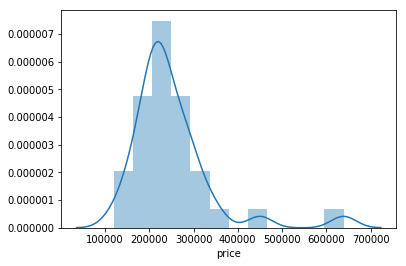

In [77]:
sns.distplot(df_price[df_price['place_with_parent_names'] == '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Acacias Blancas|']['price'])

In [76]:
#df_price['price']
df_price[df_price['place_with_parent_names'] == '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Acacias Blancas|']['price']

13313     240000.0
14722     275000.0
19272     210000.0
29201     210000.0
33041     265000.0
46760     330000.0
47310     290000.0
54043     230000.0
54045     200000.0
54381     450000.0
58919     250000.0
81726     290000.0
81882     225000.0
82161     300000.0
82325     156000.0
82918     200000.0
83568     230000.0
85002     170000.0
85130     120000.0
85673     350000.0
86244     270000.0
87371     215000.0
87623     210000.0
90553     240000.0
92408     155000.0
98102     225000.0
103245    205000.0
107987    300000.0
108238    225000.0
108323    190000.0
108735    255000.0
110077    195000.0
114074    169000.0
119941    639000.0
Name: price, dtype: float64

In [68]:
stats.kstest(df_price['price'], 'norm')

KstestResult(statistic=0.9999900803491717, pvalue=0.0)